<!--NOTEBOOK_HEADER-->
*This notebook contains material from [cbe67701-uncertainty-quantification](https://ndcbe.github.io/cbe67701-uncertainty-quantification);
content is available [on Github](git@github.com:ndcbe/cbe67701-uncertainty-quantification.git).*

<!--NAVIGATION-->
< [5.1 Chapter 5 - Ridge Regression](https://ndcbe.github.io/cbe67701-uncertainty-quantification/05.01-Contributed-Example.html) | [Contents](toc.html) | [5.3 Elastic Net Regression](https://ndcbe.github.io/cbe67701-uncertainty-quantification/05.03-Contributed-Example.html)<p><a href="https://colab.research.google.com/github/ndcbe/cbe67701-uncertainty-quantification/blob/master/docs/05.02-Contributed-Example.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://ndcbe.github.io/cbe67701-uncertainty-quantification/05.02-Contributed-Example.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>

# 5.2 Lasso Regression

Created by Haimeng Wang (hwang22@nd.edu)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

This example was adapted from:

McClarren, Ryan G (2018). Uncertainty Quantification and Predictive Computational Science: A Foundation for Physical Scientists and Engineers, Chapter 4: Local Sensitivity Analysis Based on Derivative Approximations, Springer, https://doi.org/10.1007/978-3-319-99525-0_4

## 5.2.1 Lasso Regression Basics

Lasso stands for the Least Absolute Shrinkage and Selection Operator. Unlike the ridge regression, the lasso regression make the penealty to be *1-norm* ($L_1$) of the coefficient

$$\hat{\beta}_{lasso} = \min_{\beta} \sum^{I}_{i=1}(y_i-\boldsymbol{\beta} \cdot \boldsymbol{X}_i)^2 + \lambda \Vert \boldsymbol{\beta} \Vert_1 $$

Using the $L_1$ penalty tends to make some of the coefficients to be zero, which is also called a sparse model. In a sparse model, many of the coefficients are close to zero, and there are a few large non-zero coeffcients. In other words, this model does not include variables that are not important (variables with zero coeffcients).

## 5.2.2 An example of the lasso regression ##
This is an example adapted from the example in Section 5.3 of the book. Let us assume that we have a simulation that has 200 input variables and only 120 simulations can be afforded. The *sklearn.linbear_model* is used to do the fit.

Firstly, we used a model with 5 large non-zero ceofficients (between 5~30) and the rest coefficients are 0.1

Residue of the fiting
0.9999789441481239
Weight
0.01873762187420794


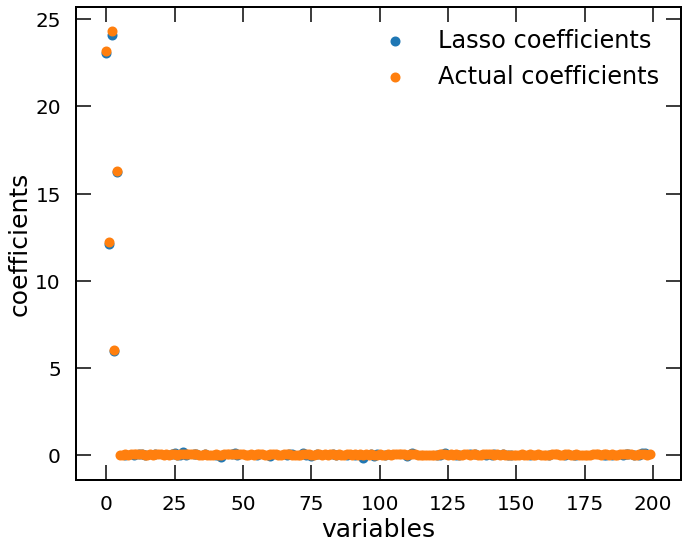

In [2]:
# Generate some sparse data
np.random.seed(711)

# number of samples is 120 and the dimension of varaibles os 200
n_samples, n_features = 100, 200
X = np.random.randn(n_samples, n_features)

# generate coefficients
LargeCoef = 5
SenCoef = np.zeros(n_features)
for i in range(LargeCoef):
    SenCoef[i] = 5 + 20*np.random.rand()
for i in range(LargeCoef, n_features):
    SenCoef[i] = 0.1*np.random.rand()
    
# generate y
y = np.dot(X, SenCoef) + np.random.normal(loc=0, scale=0.001, size=n_samples)

# cross-validation and fit
reg = LassoCV(cv=50).fit(X, y)
print("Residue of the fiting")
print(reg.score(X, y))
print("Weight")
print(reg.alpha_)

# plot the results
fig, ax = plt.subplots(figsize=(12, 9))
fig.subplots_adjust(bottom=0.15, left=0.2)

ax.scatter(np.where(reg.coef_)[0], reg.coef_[reg.coef_ != 0], label='Lasso coefficients', linewidth=4)
ax.scatter(np.where(SenCoef)[0], SenCoef[SenCoef != 0], label='Actual coefficients', linewidth=4)

# ax.set_xlim([0,n_features])
# ax.set_ylim([0, 0])
ax.set_xlabel('variables', fontsize=25)
ax.set_ylabel('coefficients', fontsize=25)
ax.legend(fontsize=24,loc='upper right',frameon=False)

ax.tick_params(which = 'both',direction='in',colors='black',
               bottom = True,top=True,left=True, right=True,pad=15)
ax.tick_params(which = 'major',direction='in',length=15,labelsize=20,width=1.5)
ax.tick_params(which = 'minor',direction='in',length=6,width = 1.5)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.0)
    
plt.show()

Then, we used a model with 20 large non-zero ceofficients (between 5~30) and the rest coefficients are 0.1

Residue of the fiting
0.9999855603124613
Weight
0.033012951782999095


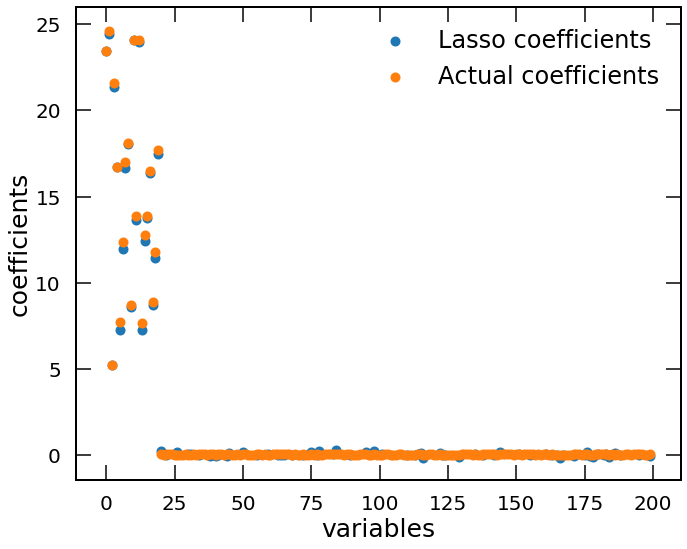

In [3]:
# Generate some sparse data
np.random.seed(6250)

# number of samples is 120 and the dimension of varaibles os 200
n_samples, n_features = 100, 200
X = np.random.randn(n_samples, n_features)

# generate coefficients
LargeCoef = 20
SenCoef = np.zeros(n_features)
for i in range(LargeCoef):
    SenCoef[i] = 5 + 20*np.random.rand()
for i in range(LargeCoef, n_features):
    SenCoef[i] = 0.1*np.random.rand()

# generate y
y = np.dot(X, SenCoef) + np.random.normal(loc=0, scale=0.001, size=n_samples)

# cross-validation and fit
reg = LassoCV(cv=50).fit(X, y)
print("Residue of the fiting")
print(reg.score(X, y))
print("Weight")
print(reg.alpha_)

# plot the results
fig, ax = plt.subplots(figsize=(12, 9))
fig.subplots_adjust(bottom=0.15, left=0.2)

ax.scatter(np.where(reg.coef_)[0], reg.coef_[reg.coef_ != 0], label='Lasso coefficients', linewidth=4)
ax.scatter(np.where(SenCoef)[0], SenCoef[SenCoef != 0], label='Actual coefficients', linewidth=4)

# ax.set_xlim([0,n_features])
# ax.set_ylim([0, 0])
ax.set_xlabel('variables', fontsize=25)
ax.set_ylabel('coefficients', fontsize=25)
ax.legend(fontsize=24,loc='upper right',frameon=False)

ax.tick_params(which = 'both',direction='in',colors='black',
               bottom = True,top=True,left=True, right=True,pad=15)
ax.tick_params(which = 'major',direction='in',length=15,labelsize=20,width=1.5)
ax.tick_params(which = 'minor',direction='in',length=6,width = 1.5)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.0)
    
plt.show()

<!--NAVIGATION-->
< [5.1 Chapter 5 - Ridge Regression](https://ndcbe.github.io/cbe67701-uncertainty-quantification/05.01-Contributed-Example.html) | [Contents](toc.html) | [5.3 Elastic Net Regression](https://ndcbe.github.io/cbe67701-uncertainty-quantification/05.03-Contributed-Example.html)<p><a href="https://colab.research.google.com/github/ndcbe/cbe67701-uncertainty-quantification/blob/master/docs/05.02-Contributed-Example.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://ndcbe.github.io/cbe67701-uncertainty-quantification/05.02-Contributed-Example.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>